In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Advertising.csv")

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


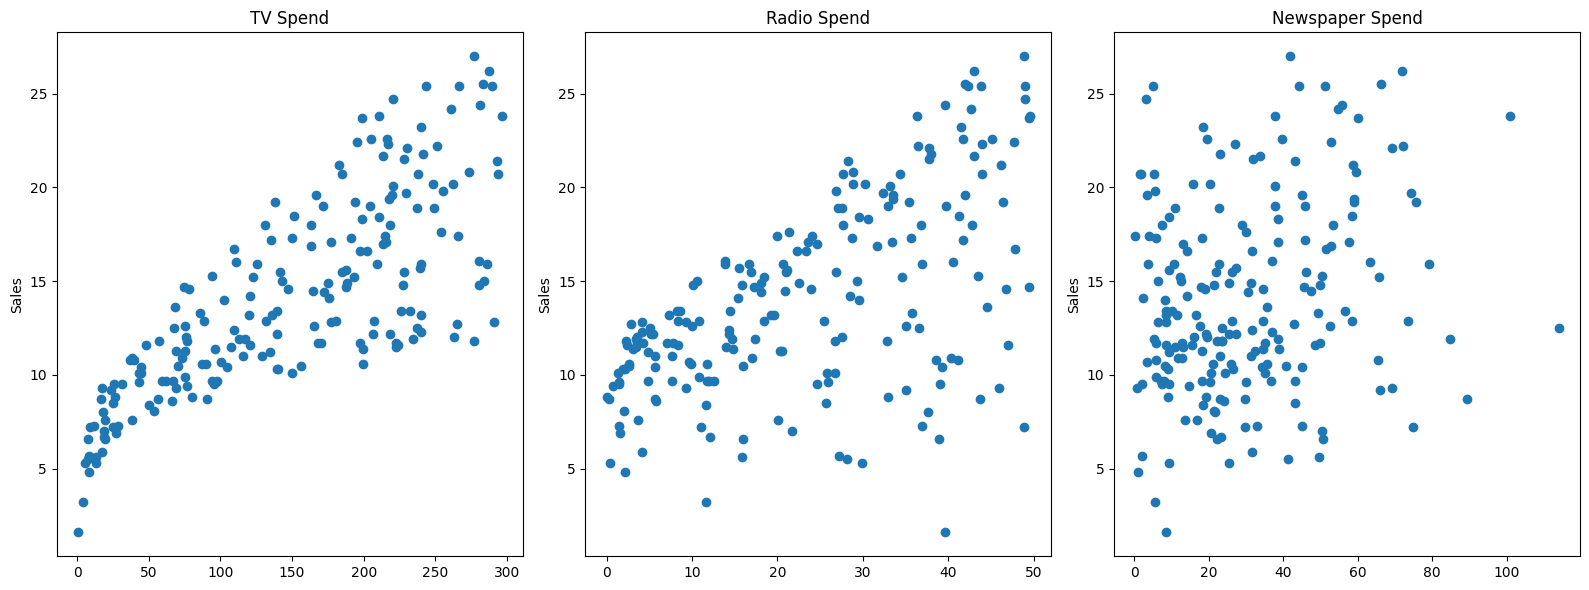

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].set_ylabel("Sales")
axes[1].set_title("Radio Spend")

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].set_ylabel("Sales")
axes[2].set_title("Newspaper Spend")

plt.tight_layout();

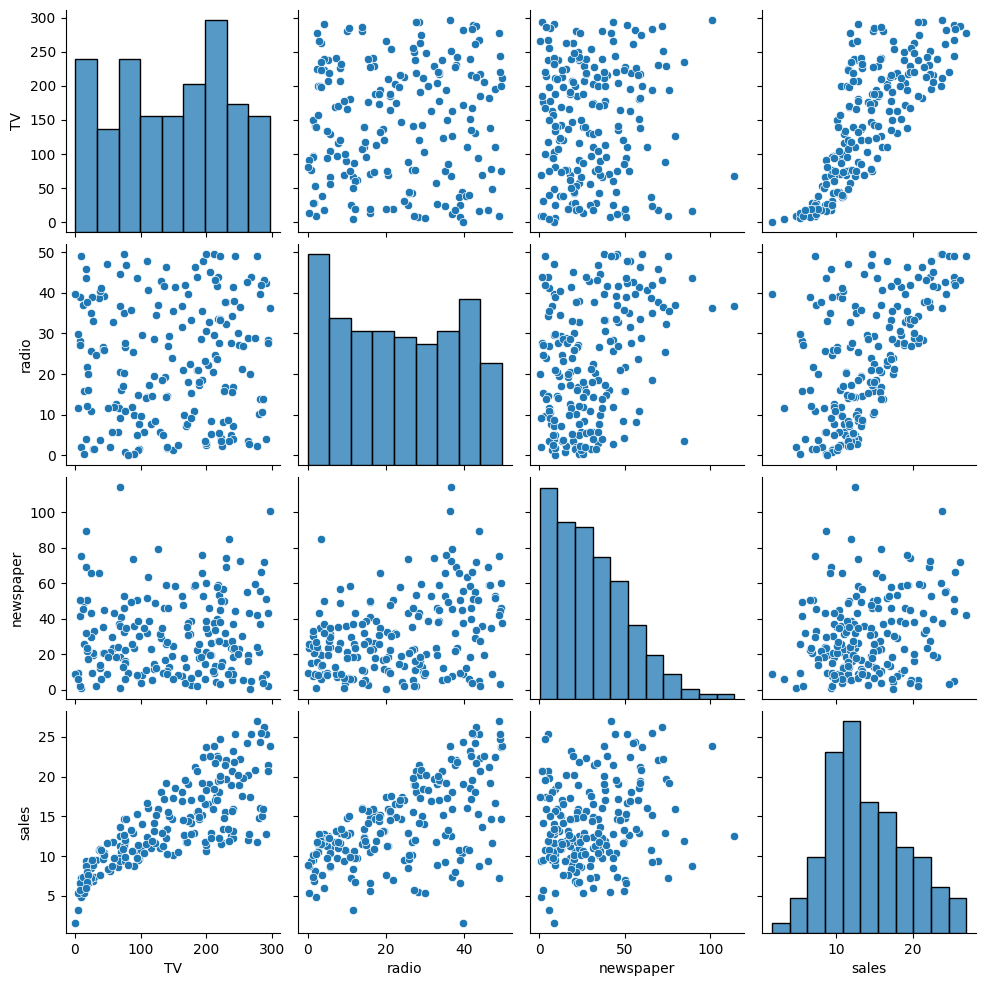

In [11]:
sns.pairplot(df)

In [12]:
X = df.drop('sales', axis=1)

In [13]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [14]:
y = df['sales']

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
# shuffle first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [18]:
X_train

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [19]:
y_train

85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
       ... 
63     14.0
70     18.3
81     12.3
11     17.4
95     16.9
Name: sales, Length: 140, dtype: float64

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
mymodel = LinearRegression()

In [23]:
mymodel.fit(X_train, y_train)

LinearRegression()

In [26]:
test_predictions = mymodel.predict(X_test)

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [28]:
df['sales'].mean()

14.0225

<AxesSubplot:xlabel='sales', ylabel='Count'>

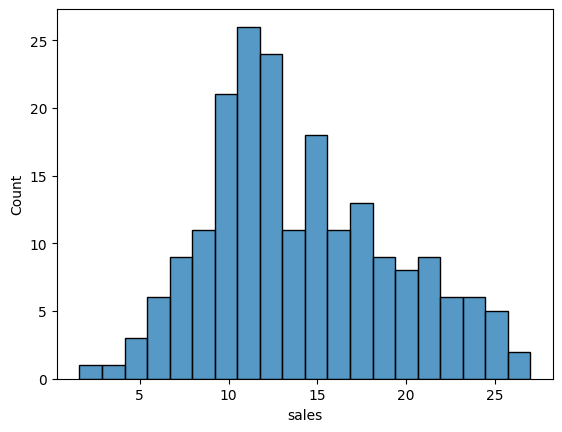

In [30]:
sns.histplot(data=df, x='sales',bins=20)

In [31]:
mean_absolute_error(y_test, test_predictions)

1.213745773614481

In [34]:
#RMSE
np.sqrt(mean_squared_error(y_test, test_predictions))

1.5161519375993884

In [35]:
test_residuals = y_test - test_predictions

In [37]:
# test_residuals

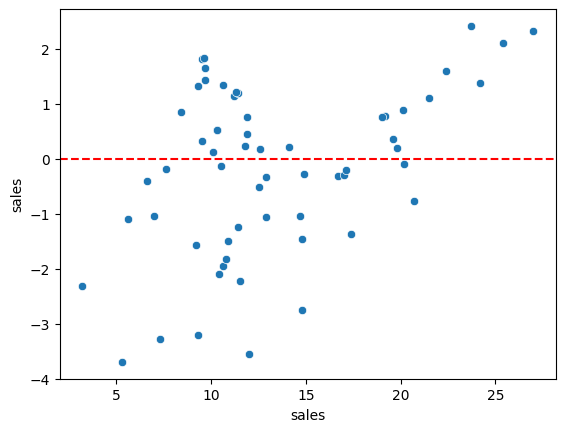

In [44]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='red', ls='--')

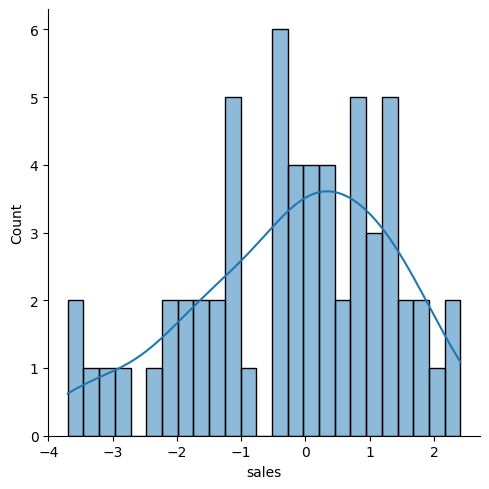

In [42]:
sns.displot(test_residuals, bins=25, kde=True)

In [45]:
final_model = LinearRegression()

In [46]:
final_model.fit(X, y)

LinearRegression()

In [47]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [48]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [49]:
y_hat = final_model.predict(X)

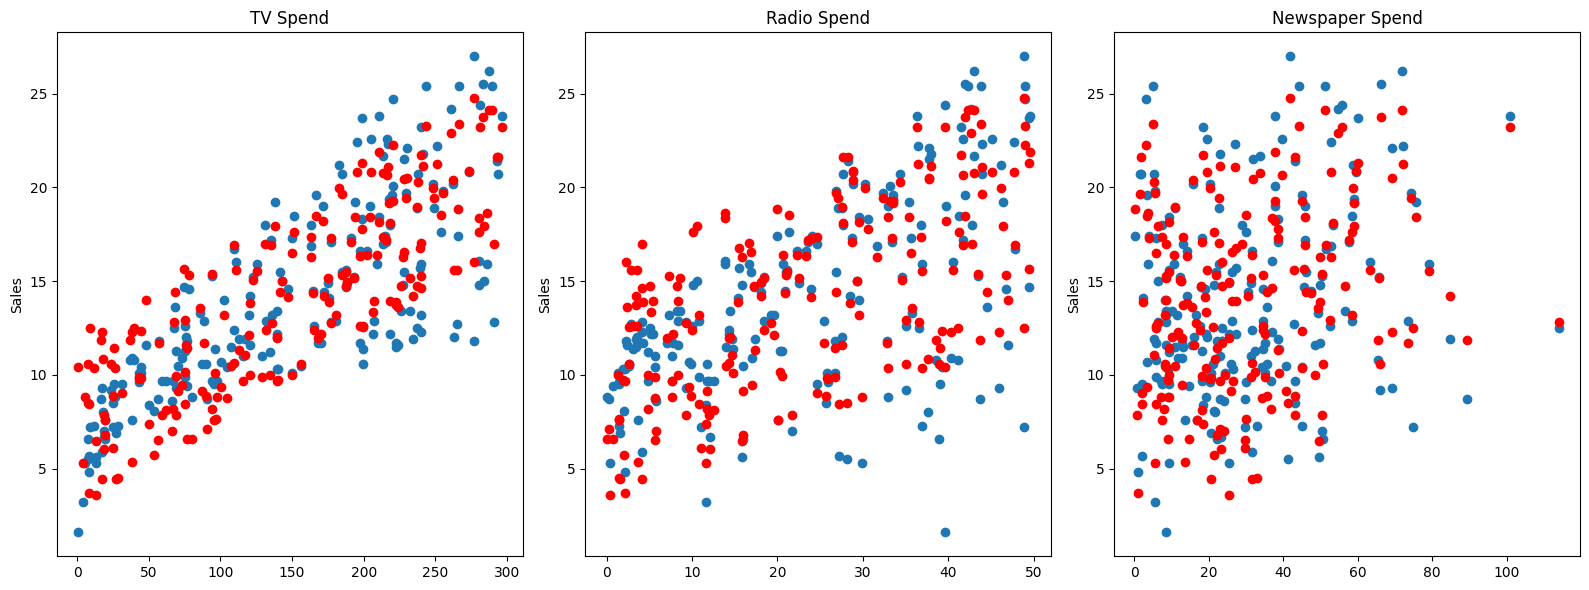

In [52]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].plot(df['TV'], y_hat, 'o', color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].plot(df['radio'], y_hat, 'o', color='red')
axes[1].set_ylabel("Sales")
axes[1].set_title("Radio Spend")

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].plot(df['newspaper'], y_hat, 'o', color='red')
axes[2].set_ylabel("Sales")
axes[2].set_title("Newspaper Spend")

plt.tight_layout();

In [54]:
from joblib import dump,load

In [55]:
dump(final_model, 'final_sales_model.joblib')

['final_sales_model.joblib']

In [56]:
loaded_model = load('final_sales_model.joblib')

In [57]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [58]:
X.shape

(200, 3)

In [59]:
# 149 TV, 22 Radio, 12 Newspaper
campaign = [[149,22,12]]

In [60]:
loaded_model.predict(campaign)

array([13.893032])